https://aliencoder.tistory.com/9?category=520865

[1.0, 0.8447266483622788, 0.6719196573059356, 0.5294330877622258, 0.39663211238814433, 0.28142009305117976, 0.21923078118610778, 0.1709847144704598, 0.1291553755002448, 0.12226020975402026, 0.1206875398936229, 0.15378456067503535, 0.1884753915268388, 0.1974595525773675, 0.21050775644295933, 0.2678299988365749]
[1, 0.8447266483622788, -0.14538439239912915, 0.007618938693308541, -0.07132256616707267, -0.02739048727629223, 0.09361662522881686, -0.026931565214189657, -0.007444971671295486, 0.08317874946637627, -0.0071641787125596434, 0.1511421939063428, 0.011981220654643687, -0.03960957855084257, 0.0779624973063901, 0.18237808171928008]
---Hwasung---
mean of left group, right group: 0.12407407407407413, 0.5690909090909091
std of left group, right group: 0.15773776325494682, 0.9265373065729084




C:\Users\G4560\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


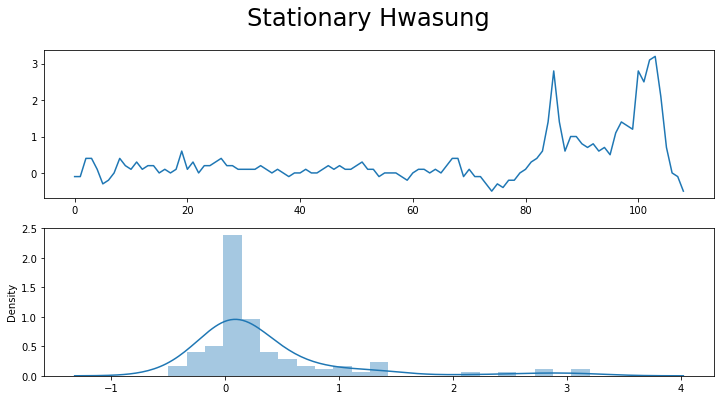

[1.         0.84472665 0.67191966 0.52943309 0.39663211 0.28142009
 0.21923078 0.17098471 0.12915538 0.12226021 0.12068754 0.15378456
 0.18847539 0.19745955 0.21050776 0.26783   ]


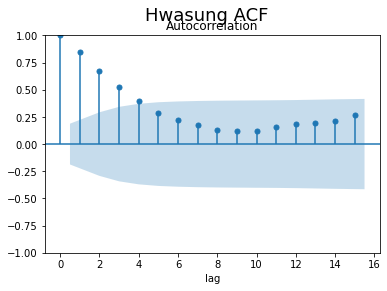

[ 1.          0.84472665 -0.14538439  0.00761894 -0.07132257 -0.02739049
  0.09361663 -0.02693157 -0.00744497  0.08317875 -0.00716418  0.15114219
  0.01198122 -0.03960958  0.0779625   0.18237808]


C:\Users\G4560\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


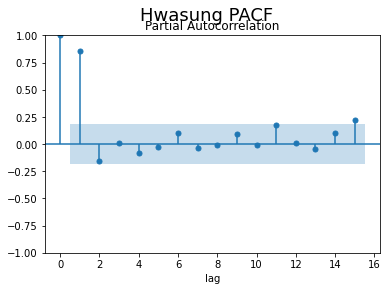

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def acf(data, k):
    data = np.array(data).reshape(-1)
    mean = data.mean()

    numerator = np.sum((data[:len(data)-k] - mean) * (data[k:] - mean))
    denominator = np.sum(np.square(data - mean))

    acf_val = numerator / denominator

    return acf_val

def pacf(data, k):
    if k == 0:
        pacf_val = 1
    else:
        gamma_array = np.array([acf(data, k) for k in range(1, k + 1)])

        gamma_matrix = []
        for i in range(k):
            temp = [0] * k
            temp[i:] = [acf(data, j) for j in range(k - i)]     # making diagonal
            gamma_matrix.append(temp)

        gamma_matrix = np.array(gamma_matrix)
        gamma_matrix = gamma_matrix + gamma_matrix.T - np.diag(gamma_matrix.diagonal())     # making symmetric matrix
        pacf_val = np.linalg.inv(gamma_matrix).dot(gamma_array)[-1]
    return pacf_val

# create a difference series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

# using plot_acf, plot_pacf
def draw_plot(target, data, lag):
    # mean variance comparision
    print("---" + target1 + "---")
    print("mean of left group, right group: {}, {}".format(
        data[:len(data) // 2].mean(), data[len(data) // 2:].mean()))
    print("std of left group, right group: {}, {}\n\n".format(
        data[:len(data) // 2].std(), data[len(data) // 2:].std()))

    # draw original data
    fig, axes = plt.subplots(2, 1, figsize=(12, 6))
    plt.suptitle("Stationary " + target1, fontsize=24)
    axes[0].plot(data)  # draw original data
    sns.distplot(data, ax=axes[1])  # draw histogram to check to follow gaussian dist.
    plt.show()

    ## ACF
    print(sm.tsa.stattools.acf(data, nlags=lag, fft=False))
    plot_acf(data, lags=lag, use_vlines=True)
    plt.suptitle(target1 + " ACF", fontsize=18)
    plt.xlabel("lag")
    plt.show()

    ## PACF
    print(sm.tsa.stattools.pacf(data, nlags=lag, method='ywm'))
    plot_pacf(data, lags=lag, use_vlines=True)
    plt.suptitle(target1 + " PACF", fontsize=18)
    plt.xlabel("lag")
    plt.show()

if __name__ == '__main__':
    target = "화성시"
    target1 = "Hwasung"
    data = pd.read_csv("아파트매매가격지수_경기도_10년.csv")[target][:500]
    data = difference(data)
    lag = 15

    acf_result = [acf(data, k) for k in range(0, lag+1)]
    print(acf_result)

    pacf_result = [pacf(data, k) for k in range(lag+1)]
    print(pacf_result)

    draw_plot(target=target, data=data, lag=lag)